# Part 1 - Template Matching

- Template matching is the simplest form of object detection.
- It simply scans a large image for a provided template by sliding the template target image across the larger image.
- The main option that can be adjusted is the comparison method used as the target template is slid across the larger image.
- The methods are all some sort of correlation based metric.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2

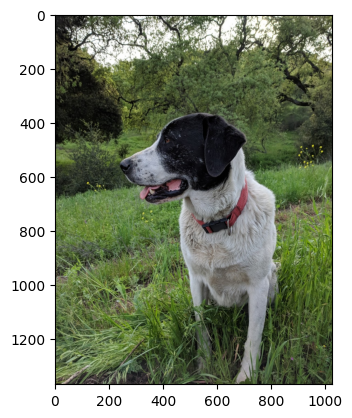

In [2]:
full = cv2.imread("../DATA/sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

plt.imshow(full);

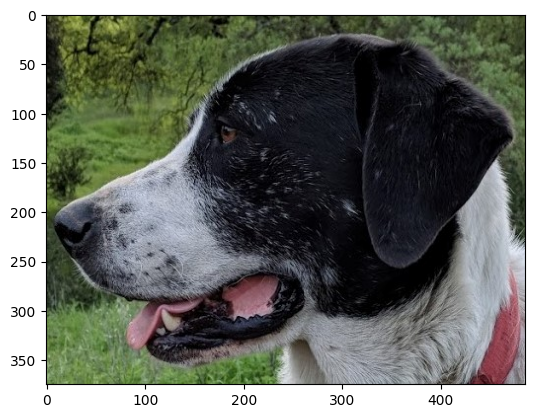

In [4]:
face = cv2.imread("../DATA/sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

plt.imshow(face);

In [5]:
full.shape, face.shape

((1367, 1025, 3), (375, 486, 3))

In [6]:
sum([1, 2, 6])

9

In [7]:
mystring = "sum"
mystring([1, 2, 6])

TypeError: 'str' object is not callable

In [8]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [9]:
myfunc = eval(mystring)
myfunc([1, 2, 6])

9

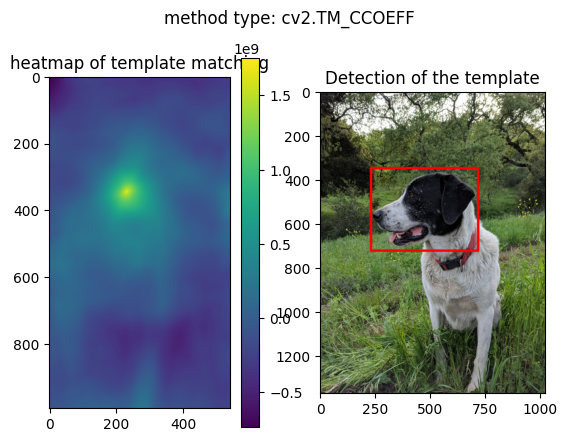

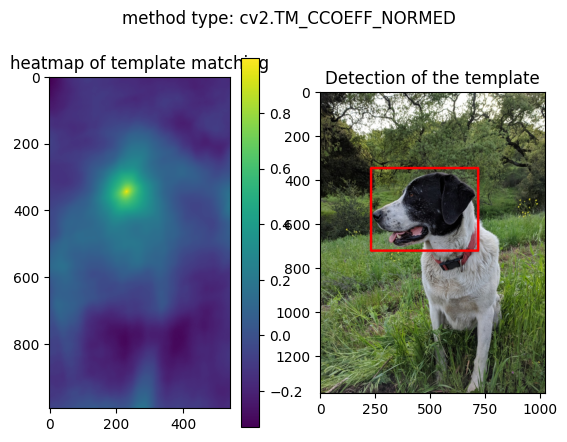

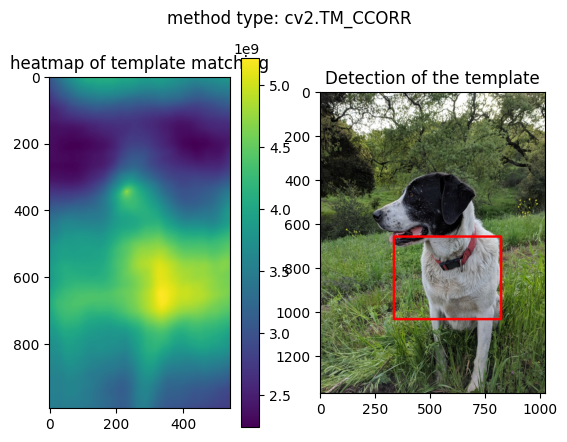

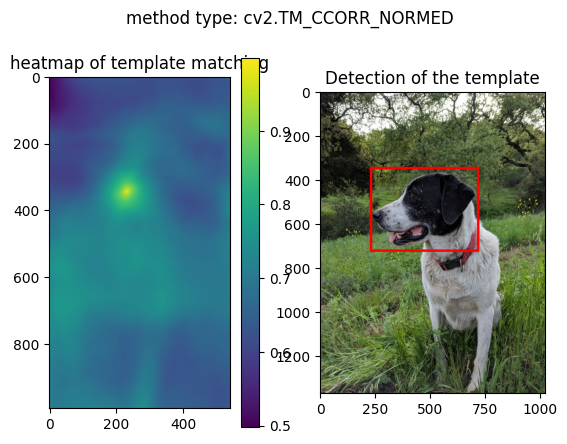

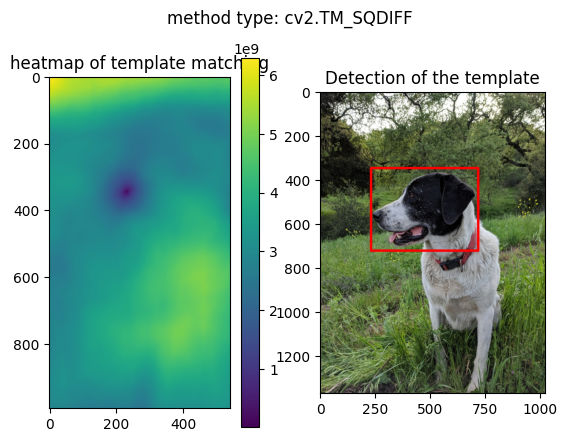

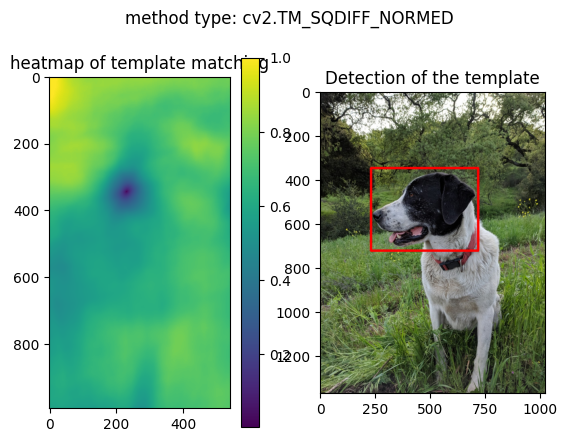

In [12]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 
           'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for m in methods:
    # create a copy, full is the full image
    full_copy = full.copy()
    
    method = eval(m)
    
    # template matching, res is the correlation between the actual and small image
    res = cv2.matchTemplate(full_copy, face, method)
    # now find the maximum and minimum values and their positions in the correlation
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height, width, channels = face.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, color=(255, 0, 0), thickness=10 )
    
    # plot and show the image
    
    plt.subplot(121)
    plt.imshow(res)
    plt.colorbar()
    plt.title("heatmap of template matching")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("Detection of the template")
    plt.suptitle(f"method type: {m}")
    
    plt.show()
    
    print("\n")
    print("\n")